## Importando as bibliotecas e os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('remuneracao.csv', delimiter=';')


## Overview

In [3]:
df.head()

,NOME,ORGAO,CARGO,REMUNERACAO DO MES,FERIAS E 13º SALARIO,VANTAGENS EVENTUAIS,LICENCA PREMIO INDENIZADA,ABONO PERMANENCIA E OUTRAS INDENIZACOES,REDUTOR SALARIAL,TOTAL LIQUIDO (R$)
0,RONALD PEREIRA MAGALHAES,CETESB,ENGENHEIRO II(G DEP),"27.009,61",NaN,NaN,NaN,NaN,NaN,"19.438,14"
1,MARIA CECILIA DA COSTA MARTINS,CETESB,ENGENHEIRO I(G AG),"27.359,58",NaN,NaN,NaN,NaN,NaN,"19.318,49"
2,MARTA EMERICH,CETESB,ARQUITETO III,"28.081,35",NaN,NaN,NaN,NaN,NaN,"20.022,51"
3,ELTON GLOEDEN,CETESB,GEOLOGO II(G DEP),"28.510,15",NaN,NaN,NaN,NaN,NaN,"20.422,68"
4,LUZIA HISAE YAMASHITA,CETESB,AN AMB III,"29.546,39",NaN,NaN,NaN,NaN,NaN,"17.239,31"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   NOME                                     1718 non-null   object 
 1   ORGAO                                    1718 non-null   object 
 2   CARGO                                    1718 non-null   object 
 3   REMUNERACAO DO MES                       1716 non-null   object 
 4   FERIAS E 13º SALARIO                     464 non-null    object 
 5   VANTAGENS EVENTUAIS                      90 non-null     object 
 6   LICENCA PREMIO INDENIZADA                0 non-null      float64
 7   ABONO PERMANENCIA E OUTRAS INDENIZACOES  3 non-null      object 
 8   REDUTOR SALARIAL                         0 non-null      float64
 9   TOTAL LIQUIDO (R$)                       1676 non-null   object 
dtypes: float64(2), object(8)
memory usage: 134.3+ KB

In [30]:
df.describe()

,remuneracao_do_mes,licenca_premio_indenizada,redutor_salarial,total_liquido
count,1716.000000,0.0,0.0,1676.000000
mean,12892.008986,NaN,NaN,10628.172428
std,7062.865162,NaN,NaN,6549.631042
min,54.780000,NaN,NaN,147.280000
25%,7698.592500,NaN,NaN,5870.952500
50%,11875.220000,NaN,NaN,9703.395000
75%,17218.255000,NaN,NaN,13680.847500
max,34395.930000,NaN,NaN,70073.160000


## Ajustar os nomes das colunas

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [27]:
df.rename(columns={'total_liquido_(r$)': 'total_liquido'}, inplace=True)

In [79]:
df.head()

,nome,orgao,cargo,remuneracao_do_mes,ferias_e_13º_salario,vantagens_eventuais,licenca_premio_indenizada,abono_permanencia_e_outras_indenizacoes,redutor_salarial,total_liquido
0,RONALD PEREIRA MAGALHAES,CETESB,ENGENHEIRO II(G DEP),27009.61,NaN,NaN,NaN,NaN,NaN,19438.14
1,MARIA CECILIA DA COSTA MARTINS,CETESB,ENGENHEIRO I(G AG),27359.58,NaN,NaN,NaN,NaN,NaN,19318.49
2,MARTA EMERICH,CETESB,ARQUITETO III,28081.35,NaN,NaN,NaN,NaN,NaN,20022.51
3,ELTON GLOEDEN,CETESB,GEOLOGO II(G DEP),28510.15,NaN,NaN,NaN,NaN,NaN,20422.68
4,LUZIA HISAE YAMASHITA,CETESB,AN AMB III,29546.39,NaN,NaN,NaN,NaN,NaN,17239.31


## Feature Engineering

In [ ]:
# Eliminar o ponto para separar os milhares
df['remuneracao_do_mes'] = df['remuneracao_do_mes'].str.replace('.', '')

# Substituir vírgulas por pontos na coluna "remuneracao_do_mes"
df['remuneracao_do_mes'] = df['remuneracao_do_mes'].str.replace(',', '.')

# Converter a coluna "remuneracao_do_mes" para o tipo float
df['remuneracao_do_mes'] = df['remuneracao_do_mes'].astype(float)

In [29]:
# Eliminar o ponto para separar os milhares
df['total_liquido'] = df['total_liquido'].str.replace('.', '')

# Substituir vírgulas por pontos na coluna "total_liquido"
df['total_liquido'] = df['total_liquido'].str.replace(',', '.')

# Converter a coluna "total_liquido" para o tipo float
df['total_liquido'] = df['total_liquido'].astype(float)


C:\Users\SIM\AppData\Local\Temp\ipykernel_13912\761024153.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_liquido'] = df['total_liquido'].str.replace('.', '')


## Analisar a remuneracao dos cargos que interessam

In [32]:
# Criar um filto para todos os cargos de tecnico ambiental

filtro_1 = df['cargo'].str.contains('TEC AMB', case=False)


In [33]:
resultados_1 = df[filtro]

In [53]:
resultados_1.head()

,nome,orgao,cargo,remuneracao_do_mes,ferias_e_13º_salario,vantagens_eventuais,licenca_premio_indenizada,abono_permanencia_e_outras_indenizacoes,redutor_salarial,total_liquido
16,MAURO DE SOUZA TEIXEIRA,CETESB,TEC AMB II(G SET),19885.66,NaN,NaN,NaN,NaN,NaN,14274.65
20,JORDAO DOMINGUES M M PAGANI,CETESB,TEC AMB I(G AG),21040.17,NaN,NaN,NaN,NaN,NaN,14726.40
29,CARLOS AUGUSTO MENDES,CETESB,TEC AMB II,22349.09,NaN,NaN,NaN,NaN,NaN,16087.88
34,EDIL GALVAO JUNQUEIRA,CETESB,TEC AMB II(G DIV),24578.71,NaN,NaN,NaN,NaN,NaN,12561.43
45,ANTONIO AMERICO PIERI,CETESB,TEC AMB II,10066.02,NaN,NaN,NaN,NaN,NaN,6155.00


In [55]:
len(resultados_1)

166

In [52]:
resultados_1['remuneracao_do_mes'].describe()

count      166.000000
mean      9916.051446
std       4924.044712
min        172.550000
25%       7107.842500
50%       8771.370000
75%      12010.332500
max      30460.590000
Name: remuneracao_do_mes, dtype: float64

In [57]:
resultados_1['total_liquido'].describe()

count      161.000000
mean      8022.333975
std       4226.645833
min        882.210000
25%       5219.240000
50%       7069.760000
75%       9961.100000
max      34781.300000
Name: total_liquido, dtype: float64

<Axes: >

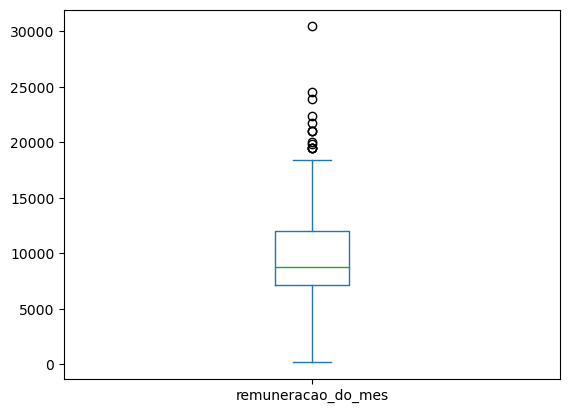

In [58]:
resultados_1['remuneracao_do_mes'].plot(kind='box')

Muitos outliers, vamos tentar filtra-los para ter uma análise mais precisa 

In [74]:
resultados_11 = resultados_1.loc[(resultados_1['total_liquido']<12000)&(resultados_1['total_liquido']>2000)]

In [76]:
resultados_11['remuneracao_do_mes'].describe()

count      138.000000
mean      9241.489420
std       3312.176933
min       2463.190000
25%       7107.842500
50%       8746.375000
75%      11108.145000
max      21040.170000
Name: remuneracao_do_mes, dtype: float64

In [77]:
resultados_11['total_liquido'].describe()

count      138.000000
mean      6807.944348
std       2292.278413
min       2721.140000
25%       5044.905000
50%       6355.125000
75%       8544.742500
max      11745.470000
Name: total_liquido, dtype: float64

<Axes: >

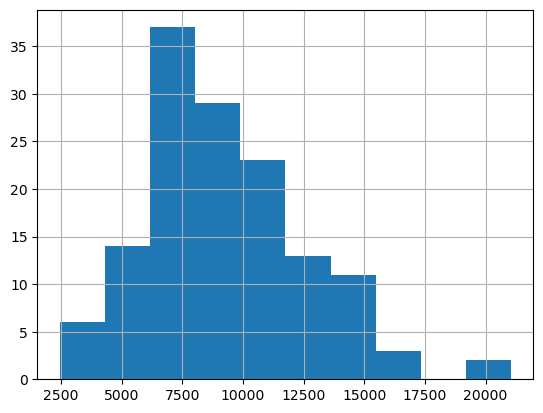

In [78]:
resultados_11['remuneracao_do_mes'].hist()

<Axes: >

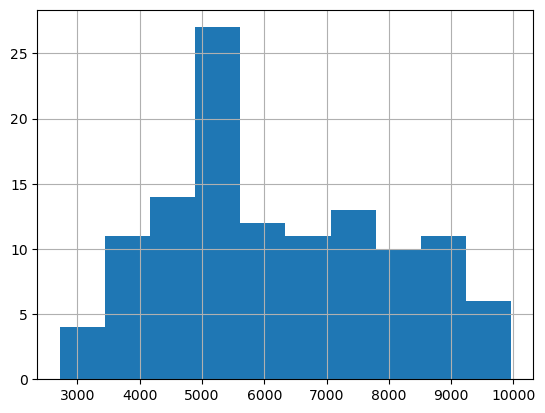

In [65]:
resultados_11['total_liquido'].hist()

## Analisar exclusivamente TEC AMB I

In [39]:
resultado_2 = df.loc[df['cargo']=='TEC AMB I']

In [40]:
resultado_2

,nome,orgao,cargo,remuneracao_do_mes,ferias_e_13º_salario,vantagens_eventuais,licenca_premio_indenizada,abono_permanencia_e_outras_indenizacoes,redutor_salarial,total_liquido
97,ALEXANDRE FERRANTE,CETESB,TEC AMB I,13929.54,NaN,NaN,NaN,NaN,NaN,9892.61
149,MAURICIO DOS SANTOS,CETESB,TEC AMB I,7803.45,"4.251,38",NaN,NaN,NaN,NaN,5889.44
224,LUANA Y MOLINA SELLUCIO,CETESB,TEC AMB I,5689.32,"572,73",NaN,NaN,NaN,NaN,4776.71
245,IVO FREITAS DE OLIVEIRA,CETESB,TEC AMB I,5149.73,NaN,NaN,NaN,NaN,NaN,3873.92
275,CLAUDIO SANTOS SORC,CETESB,TEC AMB I,9191.21,"491,61",NaN,NaN,NaN,NaN,5819.62
287,JOAO ALBERTINI DORTI,CETESB,TEC AMB I,2765.73,NaN,NaN,NaN,NaN,NaN,NaN
353,ALEX MIRANDA SILVA,CETESB,TEC AMB I,10581.47,"1.392,79",NaN,NaN,NaN,NaN,8884.72
354,MARIA VIDAL PANTAROTTO,CETESB,TEC AMB I,2463.19,"10.859,35",NaN,NaN,NaN,NaN,11031.52
431,RAQUEL GENTIL BATISTA RIBEIRO,CETESB,TEC AMB I,6758.14,NaN,"2.361,64",NaN,NaN,NaN,7506.79
595,JOSELITO ELIAS CORREA,CETESB,TEC AMB I,7681.82,NaN,NaN,NaN,NaN,NaN,4138.79


In [38]:
len(resultado_2)

55

In [49]:
resultado_2['remuneracao_do_mes'].describe()

count       55.000000
mean      7484.723636
std       2372.914292
min       2463.190000
25%       6400.750000
50%       7244.240000
75%       8656.665000
max      13929.540000
Name: remuneracao_do_mes, dtype: float64

In [50]:
resultado_2['total_liquido'].describecribe()

count       54.000000
mean      6248.197222
std       2626.483966
min       2831.550000
25%       4604.047500
50%       5313.700000
75%       7731.317500
max      17073.030000
Name: total_liquido, dtype: float64

<Axes: >

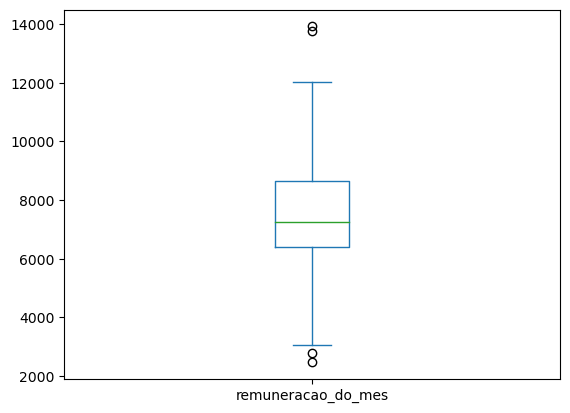

In [46]:
resultado_2['remuneracao_do_mes'].plot(kind='box')

<Axes: >

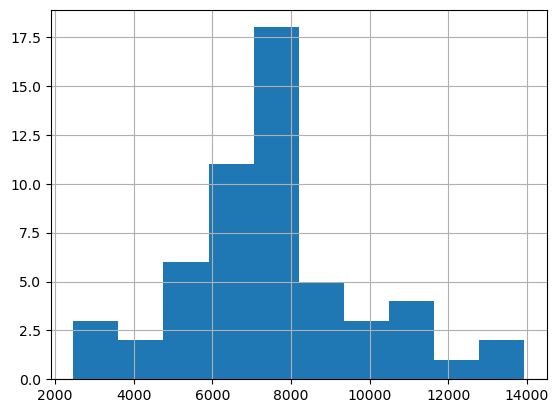

In [51]:
resultado_2['remuneracao_do_mes'].hist()

Vamos tirar os outliers também

In [69]:
resultado_22 = resultado_2.loc[(resultado_2['total_liquido']<12000)&(resultado_2['total_liquido']>2000)]

In [70]:
resultado_22['remuneracao_do_mes'].describe()

count       52.000000
mean      7658.010769
std       2260.101297
min       2463.190000
25%       6404.290000
50%       7252.810000
75%       8673.072500
max      13929.540000
Name: remuneracao_do_mes, dtype: float64

In [80]:
resultado_22['total_liquido'].describe()

count       52.000000
mean      5929.064615
std       2028.471625
min       2831.550000
25%       4538.470000
50%       5304.905000
75%       7383.272500
max      11031.520000
Name: total_liquido, dtype: float64

<Axes: >

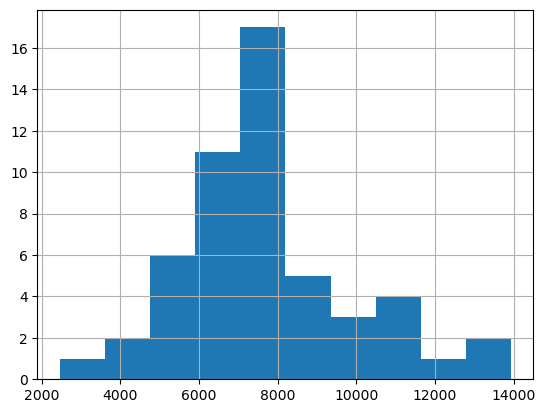

In [72]:
resultado_22['remuneracao_do_mes'].hist()

<Axes: >

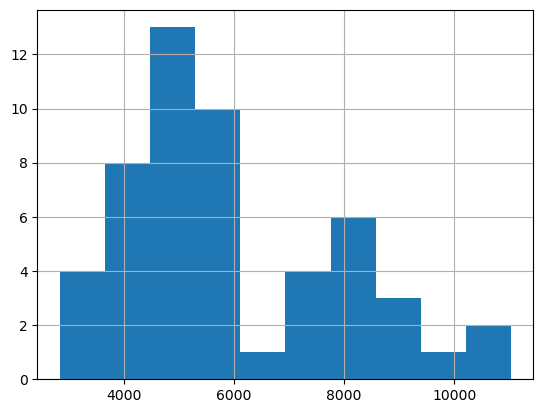

In [73]:
resultado_22['total_liquido'].hist()

## Conclusões

Com o objetivo de ter um panorama geral da remuneração dos cargos dos tecnicos ambientais, podemos utilizar:
1) as métricas de média e dos percentis 
2) visualização box plot
3) visualização do histograma

Dos tecnicos ambientais em geral, a média da remuneração bruta é de 9241.5 reais e metade deles recebem até 8746.4 reais.
Dos tecnicos ambientais I, a média da remuneração bruta é de 7658 reais e metade deles recebem até 7252.8 reais.

Podemos inferir que os valores relativamente altos para o cargo tem a influência do tempo de experiência, uma vez que o órgão 
não realizar concurso para uma ampla contratação há um bom tempo.
